>> > <span style='background :yellow'> To Predict whether the Loan is approved or not </span><hr>

### <span style='background :yellow' >1. Problem Definition :</span> 
- To build a Machine Learning Model whether the Loan is approved or not

In [1]:
# importing important libraries
import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
# from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Modeling & Accuracy Metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

### <span style='background :yellow' >2. Data Extraction/Collection :</span> 
 - Here we read dataset from the .csv file and store it to "dataset" dataframe and start out exploration

In [2]:
# reading the CSV file from local disk
# drive.mount('/content/drive/')
# dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Loan Prediction/train.csv')
dataset = pd.read_csv('train.csv')
display(dataset.head())
print(dataset.shape)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


(614, 13)


### <span style='background :yellow' >3. Data Pre-Processing :</span> 
 - **Data preprocessing** is a process of preparing the raw data and making it suitable for a machine learning model. It is the first and crucial step while creating a machine learning model. As we are working with real life datasets, it is not always a case that we come across the clean and formatted data. And while doing any operation with data, it is mandatory to clean it and put in a formatted way. So for this, we use data preprocessing task.

**A. Handling Numerical Missing Data**

In [3]:
dataset.isnull().values.any()

True

Confirm that the output is "True," which indicates that there is at least one missing value somewhere in the dataset. The next step is to find out where the missing values are.

In [4]:
# Here we see the number of pecentage of null values in each column = total number of null values in each column / number of rows * 100
dataset.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# handle numerical missing data
dataset['LoanAmount'] = dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean())
dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mean())
dataset['Credit_History'] = dataset['Credit_History'].fillna(dataset['Credit_History'].mean())

In [7]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

**B. Handling Categorical Missing Data**

In [8]:
dataset['Gender'] = dataset['Gender'].fillna(dataset['Gender'].mode()[0])
dataset['Married'] = dataset['Married'].fillna(dataset['Married'].mode()[0])
dataset['Dependents'] = dataset['Dependents'].fillna(dataset['Dependents'].mode()[0])
dataset['Self_Employed'] = dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0])

In [9]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**C. Removing Duplicate Column (if any)**

In [10]:
# For Duplicated Rows
print(f"Duplicated Rows : {dataset.duplicated().sum()}")

Duplicated Rows : 0


### <span style='background :yellow' >4. Exploratory Data Analysis :</span> 
 - **Exploratory Data Analysis** is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. It is also used to filter the data from redundancy

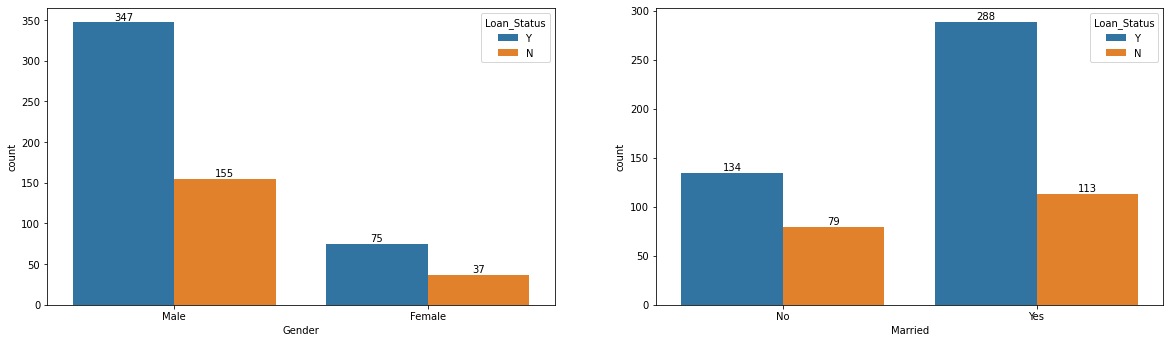

In [11]:
# categorical data
warnings.filterwarnings("ignore")
fig = plt.figure(figsize =(20,12)) 
plt.subplot(2, 2, 1)
ax = sns.countplot(dataset['Gender'],hue = dataset['Loan_Status'])
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2), y = height + 3, s = '{:.0f}'.format(height), ha = 'center')

plt.subplot(2, 2, 2)
ax = sns.countplot(dataset['Married'],hue = dataset['Loan_Status'])
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2), y = height + 3, s = '{:.0f}'.format(height), ha = 'center')
plt.show()

Hypothesis : More Males have recieved approval for loan and number of married persons is more who got loan approval than unmarried people.

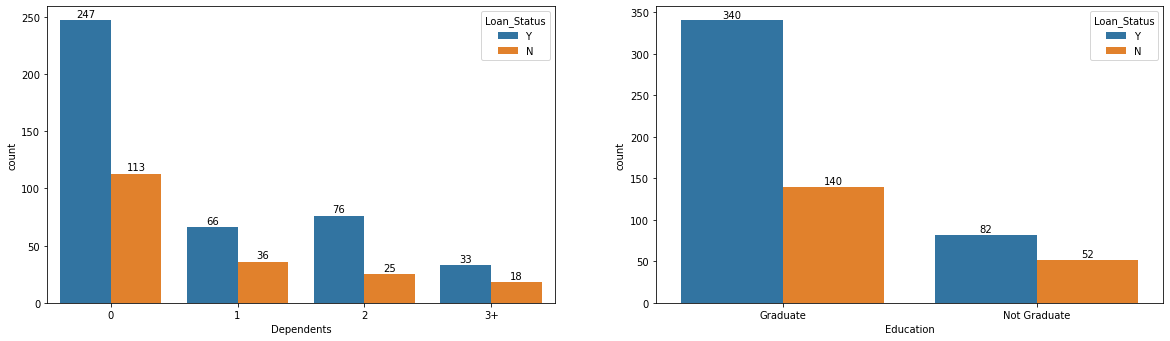

In [12]:
# categorical data
warnings.filterwarnings("ignore")
fig = plt.figure(figsize =(20,12)) 
plt.subplot(2, 2, 1)
ax = sns.countplot(dataset['Dependents'],hue = dataset['Loan_Status'])
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2), y = height + 3, s = '{:.0f}'.format(height), ha = 'center')
plt.subplot(2, 2, 2)
ax = sns.countplot(dataset['Education'],hue = dataset['Loan_Status'])
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2), y = height + 3, s = '{:.0f}'.format(height), ha = 'center')
plt.show()

Hypothesis : when no dependent is there, loan approval is more and graduate people have got more loan approval than non-graduate people

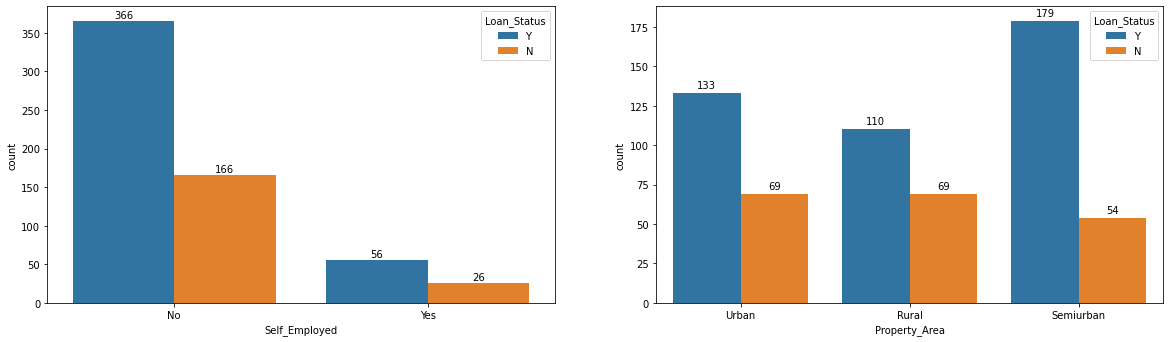

In [13]:
# categorical data
warnings.filterwarnings("ignore")
fig = plt.figure(figsize =(20,12)) 
plt.subplot(2, 2, 1)
ax = sns.countplot(dataset['Self_Employed'],hue = dataset['Loan_Status'])
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2), y = height + 3, s = '{:.0f}'.format(height), ha = 'center')

plt.subplot(2, 2, 2)
ax = sns.countplot(dataset['Property_Area'],hue = dataset['Loan_Status'])
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2), y = height + 3, s = '{:.0f}'.format(height), ha = 'center')
plt.show()

Hypothesis : number of Self-employed people taking loan is less. Semiurban area has more number of loan.

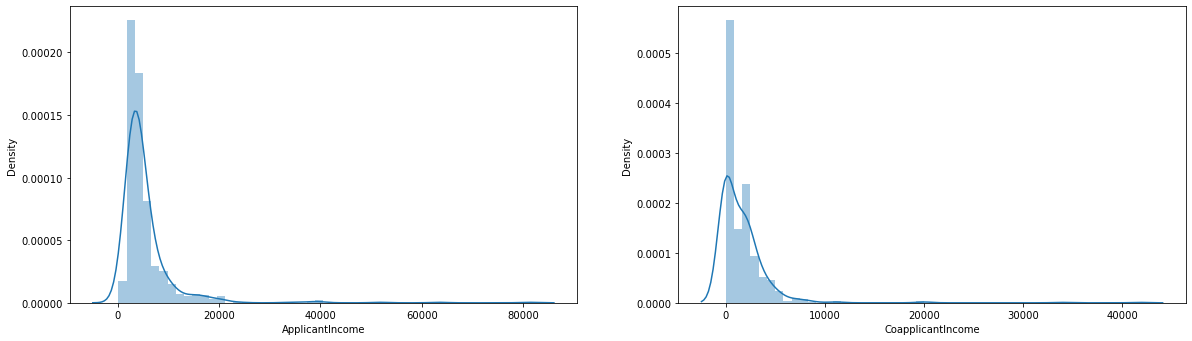

In [14]:
# numerical data
fig = plt.figure(figsize =(20,12)) 
plt.subplot(2, 2, 1)
sns.distplot(dataset['ApplicantIncome'])
plt.subplot(2, 2, 2)
sns.distplot(dataset['CoapplicantIncome'])
plt.show()

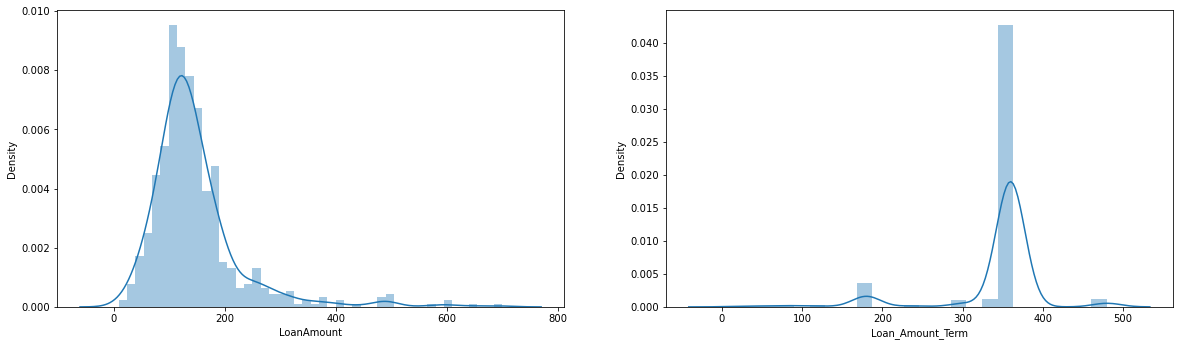

In [15]:
# numerical data
fig = plt.figure(figsize =(20,12)) 
plt.subplot(2, 2, 1)
sns.distplot(dataset['LoanAmount'])
plt.subplot(2, 2, 2)
sns.distplot(dataset['Loan_Amount_Term'])
plt.show()

### <span style='background :yellow' >5. Feature engineering :</span> 
 - **Feature engineering** is the process of using domain knowledge of the data to create features that make machine learning algorithms work. Feature engineering is fundamental to the application of machine learning and is both difficult and expensive. It is simply using your existing knowledge of the dataset to create new features that can help a machine learning model perform better.

In [16]:
# Creating 'Total_income' as a new column
dataset['Total_income'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']

In [17]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
dataset['Gender_encoded'] = labelencoder.fit_transform(dataset['Gender'])
dataset['Married_encoded'] = labelencoder.fit_transform(dataset['Married'])
dataset['Dependents_encoded'] = labelencoder.fit_transform(dataset['Dependents'])
dataset['Education_encoded'] = labelencoder.fit_transform(dataset['Education'])
dataset['Self_Employed_encoded'] = labelencoder.fit_transform(dataset['Self_Employed'])
dataset['Property_Area_encoded'] = labelencoder.fit_transform(dataset['Property_Area'])
dataset['Loan_Status_encoded'] = labelencoder.fit_transform(dataset['Loan_Status'])

 - Creating dictionary for mapping the encoding for the test dataset
 - as the dictionary is created with the groupby method, but for every key we have a list of same element throughout the list as we have the groupby, so creating a main dictionary with one element from the list as the KEY and key of that dictionary as value of this dictionary

In [18]:
# For 'Gender_encoded' Column
label_dict_temp, label_dict_gender = {}, {}
label_dict_temp = dataset.groupby(['Gender_encoded'])['Gender'].unique().apply(list).to_dict()
for i in label_dict_temp.keys():
    label_dict_gender[label_dict_temp[i][0]] = i
label_dict_gender

{'Female': 0, 'Male': 1}

In [19]:
# For 'Married_encoded' Column
label_dict_temp2, label_dict_married = {}, {}
label_dict_temp2 = dataset.groupby(['Married_encoded'])['Married'].unique().apply(list).to_dict()
for i in label_dict_temp2.keys():
    label_dict_married[label_dict_temp2[i][0]] = i
label_dict_married

{'No': 0, 'Yes': 1}

In [20]:
# For 'Dependents_encoded' Column
label_dict_temp3, label_dict_dependents = {}, {}
label_dict_temp3 = dataset.groupby(['Dependents_encoded'])['Dependents'].unique().apply(list).to_dict()
for i in label_dict_temp3.keys():
    label_dict_dependents[label_dict_temp3[i][0]] = i
label_dict_dependents

{'0': 0, '1': 1, '2': 2, '3+': 3}

In [21]:
# For 'Education_encoded' Column
label_dict_temp4, label_dict_education = {}, {}
label_dict_temp4 = dataset.groupby(['Education_encoded'])['Education'].unique().apply(list).to_dict()
for i in label_dict_temp4.keys():
    label_dict_education[label_dict_temp4[i][0]] = i
label_dict_education

{'Graduate': 0, 'Not Graduate': 1}

In [22]:
# For 'Self_Employed_encoded' Column
label_dict_temp5, label_dict_self_employed = {}, {}
label_dict_temp5 = dataset.groupby(['Self_Employed_encoded'])['Self_Employed'].unique().apply(list).to_dict()
for i in label_dict_temp5.keys():
    label_dict_self_employed[label_dict_temp5[i][0]] = i
label_dict_self_employed

{'No': 0, 'Yes': 1}

In [23]:
# For 'Property_Area_encoded' Column
label_dict_temp6, label_dict_property_area = {}, {}
label_dict_temp6 = dataset.groupby(['Property_Area_encoded'])['Property_Area'].unique().apply(list).to_dict()
for i in label_dict_temp6.keys():
    label_dict_property_area[label_dict_temp6[i][0]] = i
label_dict_property_area

{'Rural': 0, 'Semiurban': 1, 'Urban': 2}

In [24]:
# For 'Loan_Status_encoded' Column
label_dict_temp7, label_dict_loan_status = {}, {}
label_dict_temp7 = dataset.groupby(['Loan_Status_encoded'])['Loan_Status'].unique().apply(list).to_dict()
for i in label_dict_temp7.keys():
    label_dict_loan_status[label_dict_temp7[i][0]] = i
label_dict_loan_status

{'N': 0, 'Y': 1}

**Applying Changes on Test Dataset**

In [25]:
# test_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Loan Prediction/test.csv')
test_dataset = pd.read_csv('test.csv')
display(test_dataset.head())
print(test_dataset.shape)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


(367, 12)


In [26]:
# filling numerical missing data
test_dataset['LoanAmount'] = test_dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean())
test_dataset['Loan_Amount_Term'] = test_dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mean())
test_dataset['Credit_History'] = test_dataset['Credit_History'].fillna(dataset['Credit_History'].mean())

# filling categorical missing data
test_dataset['Gender'] = test_dataset['Gender'].fillna(dataset['Gender'].mode()[0])
test_dataset['Married'] = test_dataset['Married'].fillna(dataset['Married'].mode()[0])
test_dataset['Dependents'] = test_dataset['Dependents'].fillna(dataset['Dependents'].mode()[0])
test_dataset['Self_Employed'] = test_dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0])

test_dataset['Total_income'] = test_dataset['ApplicantIncome'] + test_dataset['CoapplicantIncome']

In [27]:
# # Adding the dictionary to new columns

test_dataset['Gender_encoded'] = test_dataset['Gender'].map(label_dict_gender)
test_dataset['Married_encoded'] = test_dataset['Married'].map(label_dict_married)
test_dataset['Dependents_encoded'] = test_dataset['Dependents'].map(label_dict_dependents)
test_dataset['Education_encoded'] = test_dataset['Education'].map(label_dict_education)
test_dataset['Self_Employed_encoded'] = test_dataset['Self_Employed'].map(label_dict_self_employed)
test_dataset['Property_Area_encoded'] = test_dataset['Property_Area'].map(label_dict_property_area)

In [28]:
# 'Loan_ID' is un-useful column, so deleting it.
# As 'Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area',"Loan_Status" columns have been encoded
cols = ['Loan_ID','Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area',"Loan_Status"]
dataset.drop(columns=cols,inplace=True)
cols.pop() # Removing "Loan_Status" from cols list
test_dataset.drop(columns=cols,inplace=True)

In [29]:
# specify input and output attributes
x = dataset.drop(columns=['Loan_Status_encoded'], axis=1)
y = dataset['Loan_Status_encoded']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

### <span style='background :yellow' >6. Feature Selection :</span> 
 - **Feature selection** is the process of reducing the number of input variables when developing a predictive model to reduce the computational cost of modeling and, in some cases, to improve the performance of the model.
 - We are using Sequential Feature Selector to select the features

In [31]:
# Sequential Forward Selection(sfs)
feature_score_list = []
feature_list = []
for i in range(1,13):
    sfs = SFS(LinearRegression(), k_features=i, forward=True, floating=False, scoring = 'r2', cv = 0)
    sfs.fit(x_train, y_train)
    selected_features = list(sfs.k_feature_names_)
    feature_list.append(selected_features)
    feature_score_list.append(sfs.k_score_)

max_score = feature_score_list.index(max(feature_score_list))
print(feature_score_list[max_score])
print(feature_list[max_score])

0.3220789523067532
['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_income', 'Gender_encoded', 'Married_encoded', 'Dependents_encoded', 'Education_encoded', 'Self_Employed_encoded', 'Property_Area_encoded']


### <span style='background :yellow' >7. Models :</span> 
 - **Supervised learning** is where you have input variables (x) and an output variable (Y) and you use an
algorithm to learn the mapping function from the input to the output.
Y = f(X)
The goal is to approximate the mapping function so well that when you have new input data (x) that you
can predict the output variables (Y) for that data.
It is called supervised learning because the process of an algorithm learning from the training dataset can
be thought of as a teacher supervising the learning process. We know the correct answers, the algorithm
iteratively makes predictions on the validation data and is corrected by the teacher.

#### **1. Random Forest Regressor**

Max:  45


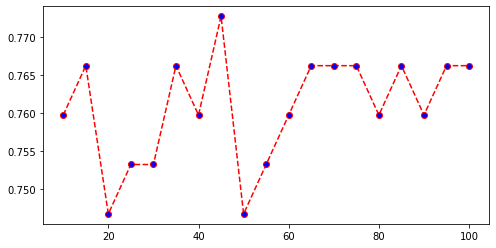

In [32]:
results = []
n_estimator_options = [10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
# None means 1 unless in a joblib.parallel_backend context. -1 means using all processors
for trees in n_estimator_options:
    model = RandomForestClassifier(trees, oob_score=True, n_jobs=-1, random_state=101)
    model.fit(x_train[feature_list[max_score]], y_train)
    Y_pred_val = model.predict(x_test[feature_list[max_score]])
    accuracy = np.mean(y_test == Y_pred_val)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_options).plot(color="red",linestyle='dashed', marker='o', markerfacecolor='blue')
max_n_estimator = n_estimator_options[results.index(max(results))]
print("Max: ",max_n_estimator)

Max:  auto


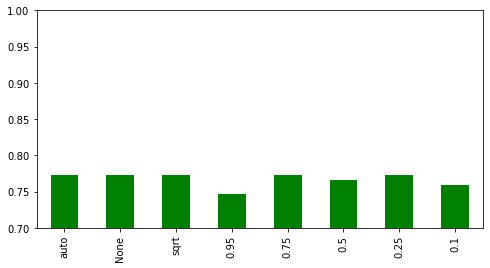

In [33]:
results = []
max_features_options = ['auto',None,'sqrt',0.95,0.75,0.5,0.25,0.10]
for trees in max_features_options:
    model = RandomForestClassifier(n_estimators = max_n_estimator, oob_score=True, n_jobs=-1, random_state=101, max_features = trees)
    model.fit(x_train[feature_list[max_score]], y_train)
    Y_pred_val = model.predict(x_test[feature_list[max_score]])
    accuracy = np.mean(y_test == Y_pred_val)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_features_options).plot(kind="bar",color="green",ylim=(0.7,1))
max_max_features = max_features_options[results.index(max(results))]
print("Max: ",max_max_features)

Max:  10


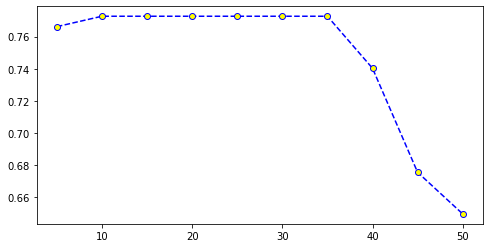

In [34]:
results = []
min_samples_leaf_options = [5,10,15,20,25,30,35,40,45,50]
for trees in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=max_n_estimator, oob_score=True, n_jobs=-1, random_state=101, max_features = max_max_features, min_samples_leaf = trees)
    model.fit(x_train[feature_list[max_score]], y_train)
    Y_pred_val = model.predict(x_test[feature_list[max_score]])
    accuracy = np.mean(y_test == Y_pred_val)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, min_samples_leaf_options).plot(color="blue",linestyle='dashed', marker='o', markerfacecolor='yellow')
max_min_samples_leaf = min_samples_leaf_options[results.index(max(results))]
print("Max: ",max_min_samples_leaf)

In [35]:
# Performing Random Forest Classifier Classifier
model_rf = RandomForestClassifier(n_estimators=max_n_estimator, oob_score=True, n_jobs=-1, random_state=101, max_features = max_max_features, min_samples_leaf = max_min_samples_leaf)
# n_estimators=70, oob_score=True, n_jobs=-1, random_state=101, max_features = None, min_samples_leaf = 30
model_rf.fit(x_train[feature_list[max_score]], y_train)

RandomForestClassifier(min_samples_leaf=10, n_estimators=45, n_jobs=-1,
                       oob_score=True, random_state=101)

In [36]:
# Testing on Val Set
Y_pred_val = model_rf.predict(x_test[feature_list[max_score]])
print(classification_report(y_test,Y_pred_val))

              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



In [37]:
print("Model Score is", model_rf.score(x_test[feature_list[max_score]], y_test)*100)
print("\nConfusion Matrix: \n",confusion_matrix(y_test,Y_pred_val))

Model Score is 77.27272727272727

Confusion Matrix: 
 [[21 33]
 [ 2 98]]


#### **2. Decision Tree Classifier**

Max:  4


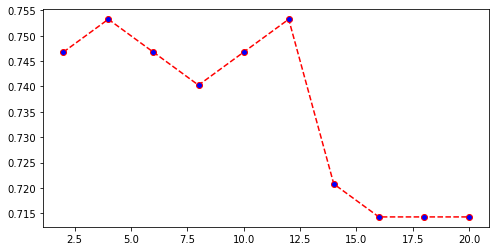

In [38]:
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(x_train[feature_list[max_score]], y_train)
    Y_pred_val = model.predict(x_test[feature_list[max_score]])
    accuracy = np.mean(y_test == Y_pred_val)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="red",linestyle='dashed', marker='o', markerfacecolor='blue')
max_max_depth = max_depth_options[results.index(max(results))]
print("Max: ",max_max_depth)

Max:  0.5


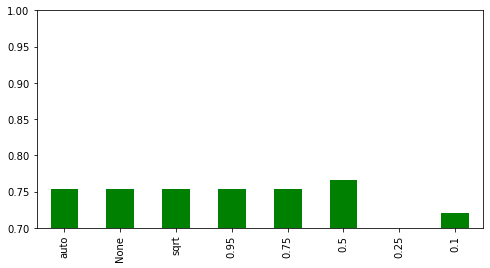

In [39]:
results = []
max_features_options = ['auto',None,'sqrt',0.95,0.75,0.5,0.25,0.10]
for trees in max_features_options:
    model = DecisionTreeClassifier(max_depth=max_max_depth, random_state=101, max_features = trees)
    model.fit(x_train[feature_list[max_score]], y_train)
    Y_pred_val = model.predict(x_test[feature_list[max_score]])
    accuracy = np.mean(y_test == Y_pred_val)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_features_options).plot(kind="bar",color="green",ylim=(0.7,1))
max_max_features = max_features_options[results.index(max(results))]
print("Max: ",max_max_features)

Max:  10


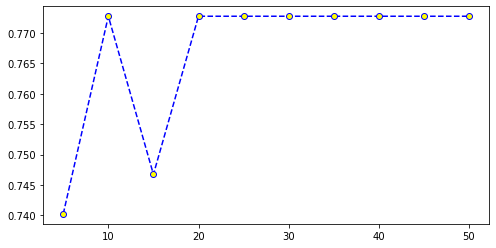

In [40]:
results = []
min_samples_leaf_options = [5,10,15,20,25,30,35,40,45,50]
for trees in min_samples_leaf_options:
    model = DecisionTreeClassifier(max_depth=max_max_depth, random_state=101, max_features = max_max_features, min_samples_leaf = trees)
    model.fit(x_train[feature_list[max_score]], y_train)
    Y_pred_val = model.predict(x_test[feature_list[max_score]])
    accuracy = np.mean(y_test == Y_pred_val)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, min_samples_leaf_options).plot(color="blue",linestyle='dashed', marker='o', markerfacecolor='yellow')
max_min_samples_leaf = min_samples_leaf_options[results.index(max(results))]
print("Max: ",max_min_samples_leaf)

In [41]:
model_dtree = DecisionTreeClassifier(max_depth=max_max_depth, random_state=101, max_features = max_max_features, min_samples_leaf = max_min_samples_leaf)
model_dtree.fit(x_train[feature_list[max_score]], y_train)

DecisionTreeClassifier(max_depth=4, max_features=0.5, min_samples_leaf=10,
                       random_state=101)

In [42]:
# Testing on Val Set
Y_pred_val = model_dtree.predict(x_test[feature_list[max_score]])
print(classification_report(y_test,Y_pred_val))

              precision    recall  f1-score   support

           0       0.83      0.44      0.58        54
           1       0.76      0.95      0.84       100

    accuracy                           0.77       154
   macro avg       0.79      0.70      0.71       154
weighted avg       0.78      0.77      0.75       154



In [43]:
print("Model Score is", model_dtree.score(x_test[feature_list[max_score]], y_test)*100)
print("\nConfusion Matrix: \n",confusion_matrix(y_test,Y_pred_val))

Model Score is 77.27272727272727

Confusion Matrix: 
 [[24 30]
 [ 5 95]]


#### **3. Logistic Regression**

In [44]:
model3 = LogisticRegression()

model3.fit(x_train[feature_list[max_score]], y_train)
print("Accuracy is", model3.score(x_test[feature_list[max_score]], y_test)*100)

Accuracy is 77.92207792207793


#### **Confusion Matrics**

In [45]:
y_pred = model3.predict(x_test[feature_list[max_score]])
cm = confusion_matrix(y_test, y_pred)
cm

array([[22, 32],
       [ 2, 98]], dtype=int64)

<AxesSubplot:>

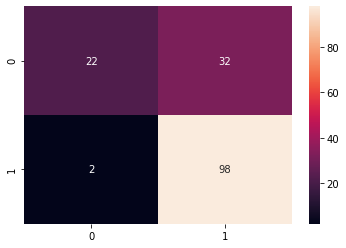

In [46]:
sns.heatmap(cm,annot = True)

### <span style='background :yellow' >8. Saving the Model</span> 

In [47]:
# Saving the model
with open("model.bin", 'wb') as f_out:
    # model in this below parameter means, model variable from random forest classifier
    pickle.dump(model3, f_out)
    f_out.close()

In [48]:
# Loading the model from saved file
with open("model.bin", 'rb') as f_in:
    # model in this below parameter means, model variable from random forest classifier
    model = pickle.load(f_in)
    f_out.close()